**Analyze the trend of technology**

Import relevant modules

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Install Google Drive access

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Set Authorization for Google

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Download the file

In [4]:
fileDownloaded = drive.CreateFile({"id":"1B6ctCVJ-dtL1S9D-klwlLs06doSXRG31"})

In [5]:
fileDownloaded.GetContentFile("survey_data_technologies_normalised.csv")

Read the file

In [6]:
df=pd.read_csv("survey_data_technologies_normalised.csv")
df

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim,NaN,NaN,NaN,NaN
3,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN
4,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74585,25142.0,Go,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74586,25142.0,HTML/CSS,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74587,25142.0,PHP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74588,25142.0,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop the first row

In [7]:
df.drop([0,0],axis=0,inplace=True)
df

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim,NaN,NaN,NaN,NaN
3,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN
4,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code,NaN,NaN,NaN,NaN
5,4.0,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74585,25142.0,Go,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74586,25142.0,HTML/CSS,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74587,25142.0,PHP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74588,25142.0,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rename "OpSys" to "OperationSystem"

In [8]:
df.rename(columns={"OpSys":"OperationSystem"},inplace=True)
df

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OperationSystem,Containers,BlockchainOrg,BlockchainIs
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim,NaN,NaN,NaN,NaN
3,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN
4,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code,NaN,NaN,NaN,NaN
5,4.0,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74585,25142.0,Go,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74586,25142.0,HTML/CSS,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74587,25142.0,PHP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74588,25142.0,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop all empty columns

In [9]:
df.drop(["OperationSystem","Containers","BlockchainOrg","BlockchainIs"],axis=1,inplace=True)
df

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim
3,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio
4,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code
5,4.0,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
74585,25142.0,Go,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74586,25142.0,HTML/CSS,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74587,25142.0,PHP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74588,25142.0,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Export to csv in Google Drive

In [10]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [11]:
df.to_csv('survey_data_technologies_normalised_cleaned.csv')
!cp survey_data_technologies_normalised_cleaned.csv "drive/My Drive"

 Grab information about development environment





In [12]:
development_environment_data=df[['Respondent','DevEnviron']]
development_environment_data

,Respondent,DevEnviron
1,4.0,Eclipse
2,4.0,Vim
3,4.0,Visual Studio
4,4.0,Visual Studio Code
5,4.0,NaN
...,...,...
74585,25142.0,NaN
74586,25142.0,NaN
74587,25142.0,NaN
74588,25142.0,NaN


Rename "DevEnviron" to "DevelopmentEnvironment"

In [13]:
development_environment_data.rename(columns={"DevEnviron":"DevelopmentEnvironment"},inplace=True)
development_environment_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Respondent,DevelopmentEnvironment
1,4.0,Eclipse
2,4.0,Vim
3,4.0,Visual Studio
4,4.0,Visual Studio Code
5,4.0,NaN
...,...,...
74585,25142.0,NaN
74586,25142.0,NaN
74587,25142.0,NaN
74588,25142.0,NaN


Group the data

In [14]:
grouped_development_environment_data=development_environment_data.groupby(by="DevelopmentEnvironment",as_index=False).sum()
grouped_development_environment_data

,DevelopmentEnvironment,Respondent
0,Android Studio,20604062.0
1,Atom,16266404.0
2,Coda,636080.0
3,Eclipse,17059259.0
4,Emacs,5642018.0
5,IPython / Jupyter,12191794.0
6,IntelliJ,38573607.0
7,Komodo,300216.0
8,Light Table,84553.0
9,NetBeans,6225417.0


Extract top 7 development environments

In [15]:
top_7_development_environment=grouped_development_environment_data.head(7)
top_7_development_environment

,DevelopmentEnvironment,Respondent
0,Android Studio,20604062.0
1,Atom,16266404.0
2,Coda,636080.0
3,Eclipse,17059259.0
4,Emacs,5642018.0
5,IPython / Jupyter,12191794.0
6,IntelliJ,38573607.0


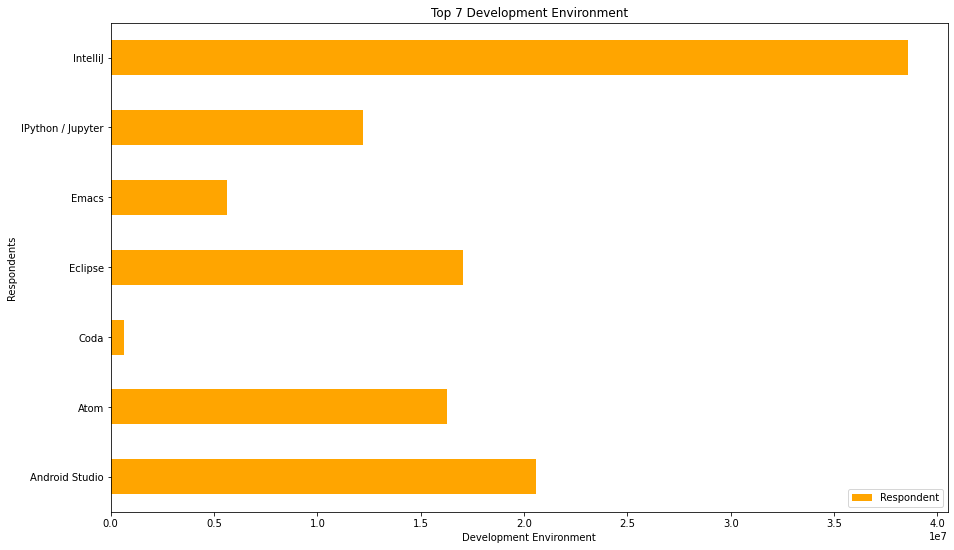

In [16]:
top_7_development_environment.plot(kind="barh",x="DevelopmentEnvironment",y="Respondent",color="orange",figsize=(15,9))
plt.title("Top 7 Development Environment")
plt.xlabel("Development Environment")
plt.ylabel("Respondents")
plt.show()